 
# COVID-19 Clinical Data to assess ICU Diagnosis.

Notebook elaborate by [Sirlene Andreis](https://github.com/AndreisSirlene). (andreissirlene@gmail.com)

Version: 18th March 2021


### This project was developed follow the Applied Data Science Bootcamp offered by [ Alura ](https://www.alura.com.br/)     


### Using a dataset suggest during the Bootcamp and made available on Kaggle by Hospital [ Sirio Libanes ](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) 


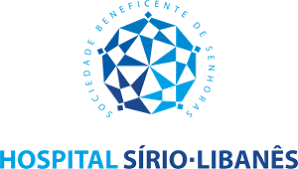


### Table of Contents:

1. [Introduction](#section-one)

2. [Functions](#section-two)

3. [Dataset](#section-three)

4. [Exploratory Data Analysis](#section-four)

4.1 [Demographic Features](#section-four-one)

4.2 [Disease Groups](#section-four-two)

4.3 [Vital Signs](#section-four-three)

4.4 [Laboratory Exams](#section-four-four)

4.5 [Feature Engineering new dataframes](#section-four-five)

5. [Machine Learning Models - Part 1](#section-five)

5.1 [Train and Compare Test Accuracy](#section-five-one)

5.2 [Random Forest Classifier](#section-five-two)

5.3 [SVC - Support Vector Machine](#section-five-three)

5.4 [Conclusion Part 1](#section-five-four)

6. [High correlated columns](#section-six)

7. [Building Models Part 2](#section-seven)

7.1 [Random Forest Classifier](#section-seven-one)

7.2 [SVC Support Vector Machine](#section-seven-two)

7.3 [Conclusion Part 2](#section-seven-three)


 <a id="section-one"></a>
## 1. Introduction

COVID-19 is thought to spread mainly through close contact from person to person, including between people who are physically near each other (within about 6 feet). People who are infected but do not show symptoms can also spread the virus to others.

When people with COVID-19 cough, sneeze, sing, talk, or breathe they produce respiratory droplets. These droplets can range in size from larger droplets (some of which are visible) to smaller droplets. Small droplets can also form particles when they dry very quickly in the airstream.
Infections occur mainly through exposure to respiratory droplets when a person is in close contact with someone who has COVID-19.

Respiratory droplets cause infection when they are inhaled or deposited on mucous membranes, such as those that line the inside of the nose and mouth. As the respiratory droplets travel further from the person with COVID-19, the concentration of these droplets decreases. Larger droplets fall out of the air due to gravity. Smaller droplets and particles spread apart in the air. With passing time, the amount of infectious virus in respiratory droplets also decreases.

The hospital worldwide has been facing the urgency consequences of Covid-19 transmissions, and request for ICU beds above the usual capacity. This project is developed in order to advice the Hospital team to be prepared and obtaining accurate prediction of the future ICU admissions for confirmed COVID-19 cases.

A research was developed to identify a Machine Learning model that could predict whether the patient will need the ICU or not.
The dataset can be download from [Kaggle]( https://www.kaggle.com/felipeveiga/starter-covid-19-sirio-libanes-icu-admission?select=Kaggle_Sirio_Libanes_ICU_Prediction.xlsx)

The population select are:

Only COVID cases (COVID patient was defined as rt-PCR positive).

Only admitted inpatients.

Only known outcome (dispatched, death).

•	Patient Encounter -> ICU admission -> Target (Yes | No)

## Available data
1.	Patient demographic information (03)
2.	Patient previous grouped diseases (09)
3.	Blood results (36)
4.	Vital signs (06)

In total there are 54 features, expanded when pertinent to the mean, median, max, min, diff and relative diff.
Data has been cleaned and scaled by column according to Min Max Scaler to fit between -1 and 1 by the Sirio-Libanes Hospital team.

## Study variables:

* ICU admission -> Target (Yes | No) - (0,1)


* Time Window - WINDOW - ['0-2', '2-4', '6-12', 'Above-12')

As stated in data description section, a model with only the "0-2 window" is more clincally relevant, so we will follow their suggestion. Moreover, as warned by the authors as well, we should be aware when the target variable (ICU) is 1, since we cannot be sure about the events' order.

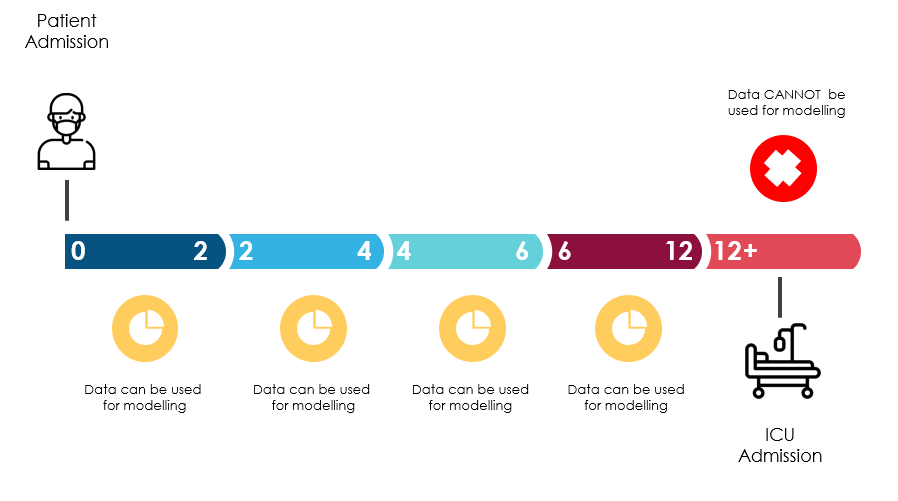

Example, we are not sure if lab results were ready before the ICU admission. Therefore, if a patient was admitted at window 0-2, we would discard the data. We will consider a patient ICU adimtted if was happened at any posterior window but we will use only 0-2 window's features.

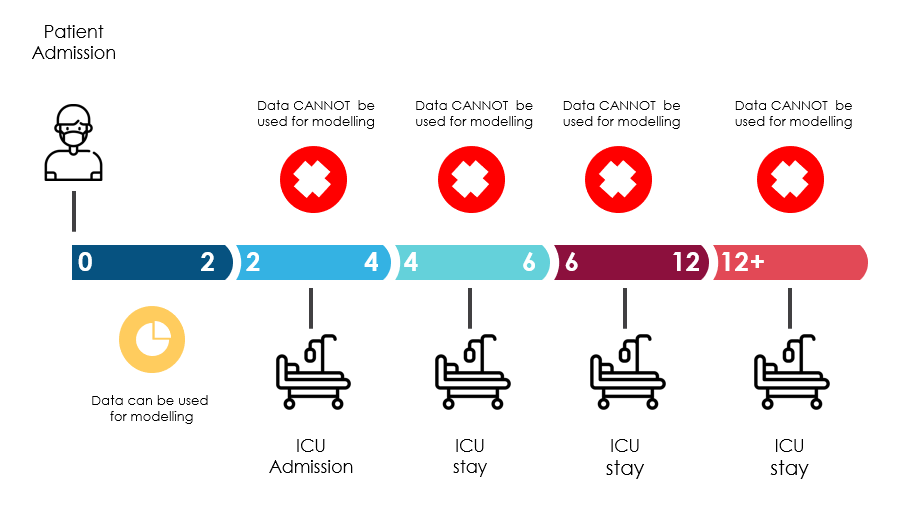


## Problem Question:
Based on the available data could a Machine Learning model predict whether the patient will need intensive care unit (ICU)?

•	Using Vital signs + Demographics features?

•	Using Laboratory exams + Demographics?

•	Using Comorbidities + Demographics?


## Conclusions

After train a full dataset on part 1 and compare to part 2 where I have taken a reduced dataset with only 69 features that are not high correlated. I came to a conclusion that the Models in part 2 behave better and using hypeparameters was possible to improve the results especial for the Random Forest Classifier model. Although it is not optimistic result as we are dealling with human lives and I have no suficient knowledge to understand the feature importances of the element of this dataset.

Patients with COVID-19 disease who have comorbidities, such as hypertension or diabetes mellitus, are more likely to develop a more severe course and progression of the disease. Furthermore, older patients, especially those 65 years old and above who have comorbidities and are infected, have an increased admission rate into the intensive care unit (ICU).
        


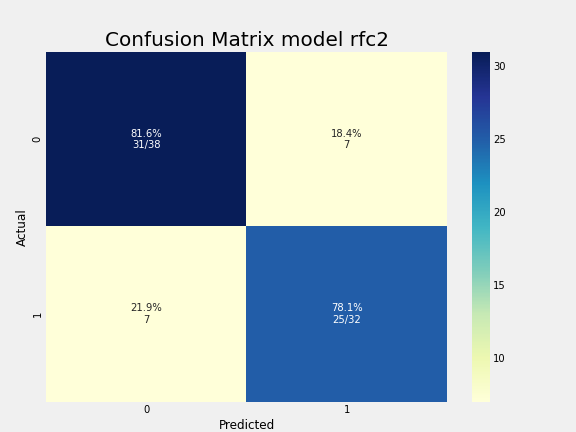

* Looking at the bottom line of the Confusion matrix, for Random Forest Classifier(rfc2 model), a higher PV (78.1%) value is optimal and means that the model is able to predict patients who will need an ICU, while a high FN (21.9%) value is bad, as it indicates that the model predicted that the patient would not need to go to the ICU, when in fact he will. In this particular case the model faill with 7 patients from the sample, which is not optimal expected because we are dealing with human live.

* In the top line, the model identify correctly (81.6%) of those who do not need an ICU, the model pedict that 7 patients (18,4%) of the calss 0 (No ICU) will need ICU but in fact they do not need.

In general we can assume that this model is acceptable, but more tecnical details shoud be taken in consideration as is a sesnsitive field of work.

  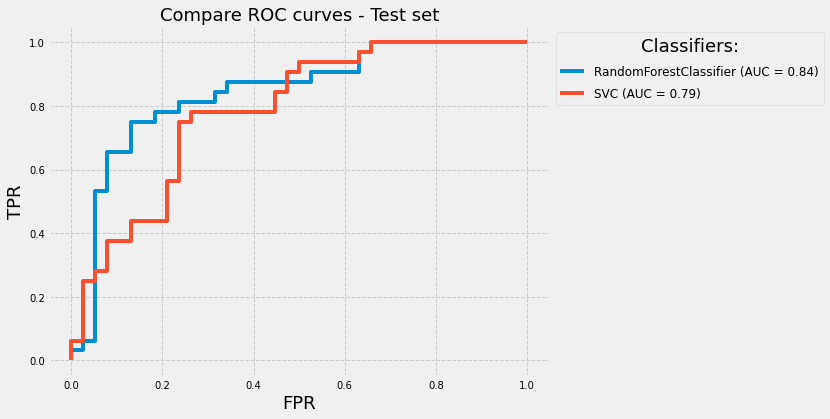

 


## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 


import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 
from sklearn.metrics import r2_score,roc_auc_score,roc_curve, auc, recall_score,make_scorer
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# XAI
import shap
import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots

#Extras
import warnings
warnings.filterwarnings('ignore')

<a id="section-two"></a>
# 2. Functions


In [2]:
# TRANSFORM THE WINDOW COLUMN VALUES TO INT 

def window_to_int(window):
    '''
    Transform the string values in int
    '''
    if window == 'ABOVE_12':
        return(13)
    else:
        return(int((window.split('-')[1]))) 
    

In [3]:
# ORGANIZE WINDOW ATRIBUTION
def organize_window(rows):
    '''
    The function check all rows to identify which column has ICU equal 1,
  than atribute this value to row 'WINDOW'= 0-2
    '''
    if np.any(rows['ICU']):
        rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1
    return rows.loc[rows['WINDOW'] == '0-2']



In [4]:
# ENCODE COLUMN Age_PERCENTIL
def encode_feature(data):
    '''
    The function is designed to encode the feature AGE_PERCENTIL
   '''
    new_age_percentil = pd.get_dummies(data[['AGE_PERCENTIL']])
    
    age_percentil = pd.concat([new_age_percentil, data], axis =1)
    
    return age_percentil

In [5]:
# FILL TABLE
def fill_in_table(data):
    '''
  The function is designed to fill the NAN values with the value of the previous 
  rows (bfill) or forward row (ffill) of the same pacient with ICU equal 1.
  '''
    continue_features_col = data.iloc[:, 13:-2].columns
    continue_features = data.query('ICU == 0').groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[continue_features_col].fillna(method = 'ffill').fillna(method = 'bfill')
    categorical_feature = data.iloc[:, :13]
    other_feature = data.iloc[:, -2:]
    icu_adm_fill = pd.concat([categorical_feature, continue_features, other_feature], ignore_index=True, axis=1)
    icu_adm_fill.columns = data.columns
    return icu_adm_fill

In [6]:
def graphic(title:str, x_label: str, y_label: str):
    '''
    Define  graphic descriptive information 
  Keywords arguments
  title: Graphic title
  x_label: Deescribe axis x 
  y_label: Describe axis y
    '''
    plt.title(title, loc='left', fontsize=20)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14);

In [7]:
# FREQUENCE TABLE
def frequence_table(data: pd.DataFrame, column: str, title: str):
    '''
  Calculate the frequence table 
  Keywords arguments
  data: DataFrame with information
  column: Serie pandas DataFrame 
  title: Descriptive title of axis/table

  return: DataFrame with frequence and percent information
  '''
    frequence = data[column].value_counts(ascending=False)
    percent = round(data[column].value_counts(normalize=True, ascending=False) * 100, 1)
    _ = pd.DataFrame(
      {'Frequence': frequence,
      'Percent %': percent})
    return _.rename_axis(title)

In [8]:
def rename_index(data: pd.DataFrame, old_index: str, 
                         value_dictionay: dict):
    '''
  Change index values
  return: New DataFrame with descriptive
  '''
    data.reset_index(inplace=True)
    data[old_index] = _[old_index].map(value_dictionay)
    _.set_index(old_index, inplace=True)
    return _

In [9]:
def select_window_1(data: pd.DataFrame, patient='PATIENT_VISIT_IDENTIFIER',
                  window='WINDOW'):
    '''
  To exclude ICU = 1 and WINDOW = 0-2, add a value 1 for the first window
  of patient admited to ICU and exclude index and columns not relevant.

  return: The first window (WINDOW == 0-2), with value 1  for patient admited to ICU
  in the next windows
  '''
    data.drop(data.query('ICU == 1 and WINDOW == "0-2"')['PATIENT_VISIT_IDENTIFIER'].values,
             inplace=True)
    data = data.groupby(patient, as_index=False).apply(organize_window)
    data.drop([patient, window], inplace=True, axis=1)
    data = data.droplevel(1)
       
    return data

In [10]:
def graphic_boost(title:str, x_label: str, y_label: str):
    '''
    Define graphic descriptions

    title: Graphic title
    x_label: description of axes X
    y_label: description axes y
  '''
    plt.title(title, loc='left', fontsize=24)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=18);

In [11]:
def run_test_models(data):
  
    X_columns = data.columns
    y = data['ICU']
    X = data[X_columns].drop(['ICU'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,stratify=y, random_state= 67235)

    results = []
    np.random.seed(67235)
    for model in [DummyClassifier,LogisticRegression,GaussianNB,
                SVC,RandomForestClassifier,GradientBoostingClassifier]:



                model_used = model()

                kfold = StratifiedKFold(n_splits=5,shuffle=True)
                val_score = model_selection.cross_val_score(model_used,X,y,scoring='roc_auc',
                                                            cv = kfold)
                
                results.append(f'{model.__name__:22} AUC:\
                {val_score.mean():.3f} STD: {val_score.std():.2f}')    

    return results

In [12]:
def run_model(model, data):

    np.random.seed(67235)
    X_columns = data.columns
    y = data['ICU']
    X = data[X_columns].drop(['ICU'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,stratify=y, random_state= 67235, )

  
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    prob_predic = model.predict_proba(X_test)
  
    auc = roc_auc_score(y_test,prob_predic[:,1])
    print(f'AUC: {auc}')
    print('\nClassification Report')
    print(classification_report(y_test,pred))

In [13]:
def correlated_columns(dataset, threshold = 0.95):       #Function developed by @Pablo Pereira
    '''
    dataset - DataFrame to localize high correlations
    threshold - cut value applied to validate the correlations
    '''
    df = dataset[dataset.describe().columns]  
    return (
        df.corr().pipe(lambda df1: pd.DataFrame(np.tril(df1,k=-1),
                                              columns = df.columns,
                                              index = df.columns))
      .stack()
      .rename('pearson')
      .pipe(
          lambda s: s[s.abs() >threshold].reset_index()
      )
      .query('level_0 not in level_1')
  )

# Verify the higher correlation above 0.95 to be removed
cut_value = 0.95

def remove_corr_var(data, cut_value):
    
    corr_matrix = data.iloc[:,4:-2].corr().abs()
    upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_exclude = [column for column in upper_matrix.columns if any(upper_matrix[column] > cut_value)]
    
    return data.drop(to_exclude, axis=1)

In [14]:
#PLOT FEATURE IMPORTANCE
def plot_feature_importance(model):
    ax, fig = plt.subplots(figsize=(25,18))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [15]:
def ROC(y_test, y_pred):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [16]:
#APPLY CROSS VALIDATION 
def run_cross_validation(model, data, n_splits, n_repeats):

    data = data.sample(frac=1).reset_index(drop=True) #This will shuffle the dataset
    X_columns = data.columns
    y = data['ICU']
    X = data[X_columns].drop(['ICU'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,stratify=y, random_state= 67235)

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
    results = cross_validate(model, X_train, y_train, cv=cv, scoring='roc_auc', return_train_score=True, return_estimator=True)
    

    auc_mean_test = np.mean(results['test_score'])
    auc_mean_train = np.mean(results['train_score'])

    
    print(f'Mean AUC test {auc_mean_test} - Mean AUC train {auc_mean_train}')
    return auc_mean_test, auc_mean_train

In [17]:
def grid_search_cv(parameters, model, X_train, y_train):

    findGrid = GridSearchCV(model, param_grid=parameters, cv=10, scoring='roc_auc')
  
  # Train the model
    findGrid.fit(X_train, y_train)

   #Find the best parameters
    best_params = findGrid.best_params_

    return best_params

In [18]:
def learning_curves(estimator, title, X, y, cv= None, train_sizes=np.linspace(.01, 1.0)):
    
    train_sizes, train_scores, validation_scores = \
        learning_curve(estimator, 
                       X,
                       y,
                       train_sizes = train_sizes,
                       cv = cv, 
                       scoring = 'neg_mean_squared_error')

    train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
    train_scores_std = np.sqrt(np.std(train_scores, axis=1))
    validation_scores_mean = np.sqrt(-np.mean(validation_scores, axis=1))
    validation_scores_std = np.sqrt(np.std(validation_scores, axis=1))
    
    plt.rcParams['font.size'] = 12
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g',label = 'Validation error')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1,
                     color='g')
    
    plt.rcParams['font.size'] = 10
    plt.ylabel('RMSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = title
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0.0,0.8)

In [19]:
def plot_cm(y_test, y_pred, figsize=(8,6)):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

<a id="section-three"></a>
# 3. Dataset

In [20]:
# Download the datasets and store in the dataframes
data = pd.read_excel('https://github.com/AndreisSirlene/Bootcamp_datascience/raw/main/Kaggle_Sirio_Libanes_ICU_Prediction%20(1).xlsx')

In [21]:
pd.set_option('display.max.columns', None)
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

##  Data cleaning

* Apply function to fill the NAN values with the value of the previous rows (bfill) or forward row (ffill) of the same pacient with ICU equal 1

* Exclude ICU = 1 and WINDOW = 0-2, add a value 1 for the first window of patient admited to ICU and exclude index

* Drop NaN values

In [22]:
icu_adm = fill_in_table(data)
icu_adm = select_window_1(icu_adm)
icu_adm.dropna(inplace=True)
icu_adm.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.868365,-0.868365,-1.0,-0.742004,-0.742004,-0.742004,-0.742004,-1.0,-0.9450

In [23]:
icu_adm.describe()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,350.000000,350.000000,350.000000,350.0000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.0,350.000000,350.000000,350

In [24]:
data.style.set_properties(**{'background-color': 'green', 'color': 'white'})
icu_adm.describe(include=object)

,AGE_PERCENTIL
count,350
unique,10
top,20th
freq,41


### Check if still left NaN values

In [25]:
clean_icu = icu_adm.copy()
#display how many nulls are in each column
px.bar(clean_icu.isnull().sum()
       ,title='Nulls Per Column'
       ,color=clean_icu.isnull().sum().index)

In [26]:
icu_adm.shape

(350, 229)

In [27]:
frequence_table(icu_adm, 'ICU','ICU')

,Frequence,Percent %
ICU,,
0,189,54.0
1,161,46.0


<a id="section-four"></a>
# 4. Exploratory Data Analysis

#### Identify Age distribution vs Admitted or not to ICU

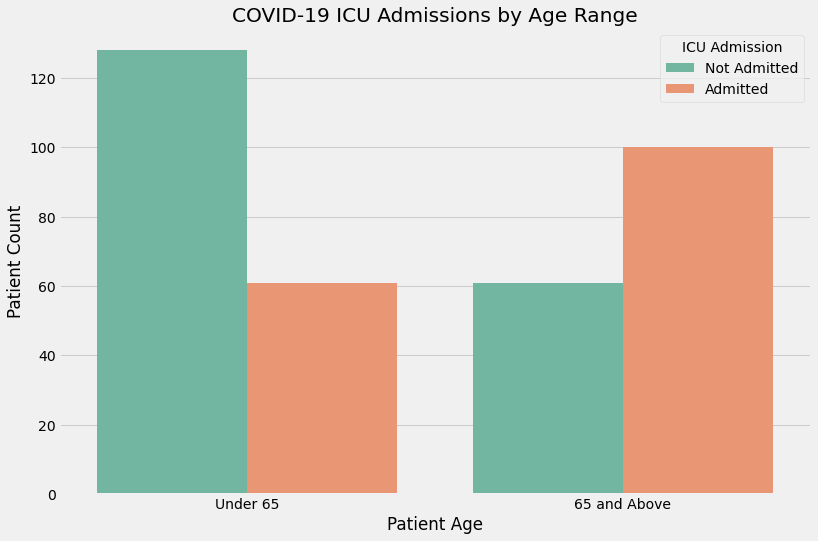

In [28]:
plt.figure(figsize=(12,8))
age = sns.countplot(icu_adm.AGE_ABOVE65, hue='ICU', data=icu_adm, palette= 'Set2')
age.set_xticklabels(['Under 65','65 and Above'])
plt.title('COVID-19 ICU Admissions by Age Range')
plt.xlabel('Patient Age')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0)
plt.legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
plt.show()

By analyze the age profile of the patients, under 65 and above 65 as shown in the bar graph above, it is notable that age above 65 increases the proportion of ICU admission.


#### Identify Gender distribution

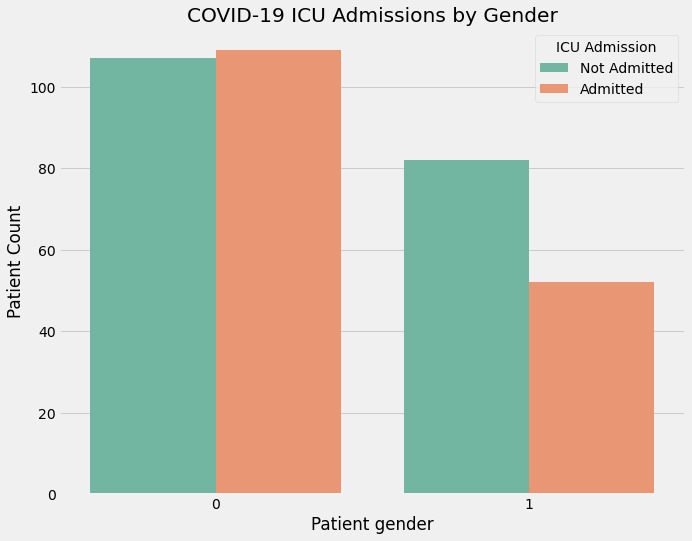

In [29]:
plt.figure(figsize=(10,8))
gender = sns.countplot(icu_adm.GENDER, hue='ICU', data=icu_adm, palette= 'Set2')
gender.set_xticklabels(['0','1'])
plt.title('COVID-19 ICU Admissions by Gender')
plt.xlabel('Patient gender')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0)
plt.legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
plt.show()

<a id="section-four-one"></a>
## 4.1 Demographic features

In [30]:
icu_adm.columns[0:3]

Index(['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER'], dtype='object')

In [31]:
demographic_feature = icu_adm[['AGE_ABOVE65','AGE_PERCENTIL','GENDER', 'ICU']]
demographic_feature.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,ICU
0,1,60th,0,1
2,0,10th,0,1
3,0,40th,1,0
4,0,10th,0,0
5,0,10th,0,0


In [32]:
no_yes = {
    0:'No',
    1: 'Yes'
}

_ = frequence_table(demographic_feature, 'AGE_ABOVE65', 
                      'Age above 65')
rename_index(_, 'Age above 65', no_yes)


,Frequence,Percent %
Age above 65,,
No,189,54.0
Yes,161,46.0


In [33]:
_ = pd.DataFrame({
    'Admitted ICU': round(demographic_feature.query('ICU == 1')['AGE_ABOVE65'].value_counts(normalize=True) * 100, 1),
    'No admitted ICU': round(demographic_feature.query('ICU == 0')['AGE_ABOVE65'].value_counts(normalize=True) * 100, 1)
})

_.rename_axis('Age above 65', inplace=True)
rename_index(_, 'Age above 65', no_yes)

,Admitted ICU,No admitted ICU
Age above 65,,
No,37.9,67.7
Yes,62.1,32.3


We can see a inverse situation regard to the age of the patient (visitor), where the group that went to an ICU marjoritly (62%) is over 65 years old, whereas the group that did not go to the ICU minority (32%) is over 65 years old, which is why elderly people are part of the risk group.

###  Percentil Age

In [34]:
icu_adm[icu_adm['ICU'] == 0 ]['AGE_PERCENTIL'].iplot(kind='hist', bins=20, colors='#5F9153')
icu_adm[icu_adm['ICU'] == 1 ]['AGE_PERCENTIL'].iplot(kind='hist', bins=20, colors='orange')


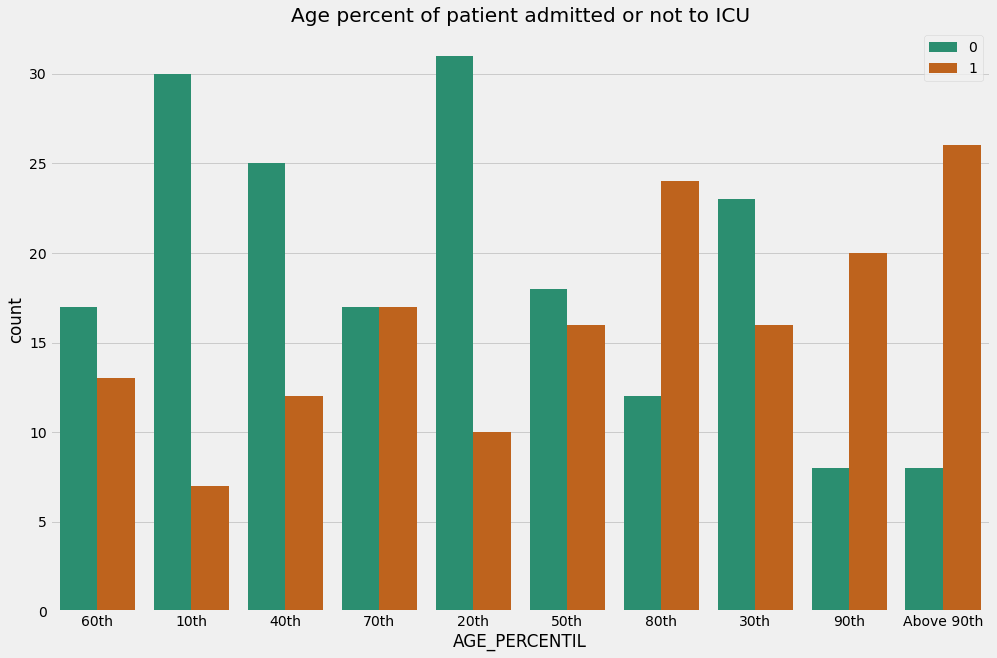

In [35]:
plt.figure(figsize=(15,10))
fig = sns.countplot(x='AGE_PERCENTIL',hue='ICU', data=icu_adm, palette='Dark2')
plt.title('Age percent of patient admitted or not to ICU')
plt.legend();

In [36]:
print(f'''Average number of patients per Age: {round(demographic_feature['AGE_PERCENTIL'].value_counts().values.mean())}
Standard Deviation of percent number of patients: {round(demographic_feature['AGE_PERCENTIL'].value_counts().values.std())}
''')

Average number of patients per Age: 35
Standard Deviation of percent number of patients: 4



<a id="section-four-two"></a>
## 4.2 Disease Groups

**Comorbidity and its Impact on Patients with COVID-19**

According to an article from [Nature Public Health Emergency Collection](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7314621/).
From the cases that emerged, it was observed that comorbidities increase the chances of infection. Based on current information and clinical expertise, the elderly, especially those in long-term care facilities, and people of any age with serious underlying medical conditions are at a greater risk of getting COVID-19.
The elderly, a vulnerable population, with chronic health conditions such as diabetes and cardiovascular or lung disease are not only at a higher risk of developing severe illness but are also at an increased risk of death if they become ill. People with underlying uncontrolled medical conditions such as diabetes; hypertension; lung, liver, and kidney disease; cancer patients on chemotherapy; smokers; transplant recipients; and patients taking steroids chronically are at increased risk of COVID-19 infection.


In [37]:
# Columns refers to groups of previous illness for patients
icu_adm.columns[3:12]

Index(['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN',
       'IMMUNOCOMPROMISED', 'OTHER'],
      dtype='object')

#### The HTN stands for Hipertension

In [38]:
diseases = icu_adm[['DISEASE GROUPING 1', 'DISEASE GROUPING 2','DISEASE GROUPING 3',
                    'DISEASE GROUPING 4','DISEASE GROUPING 5', 'DISEASE GROUPING 6',
                    'HTN','IMMUNOCOMPROMISED', 'OTHER', 'ICU']]
diseases.head()

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ICU
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


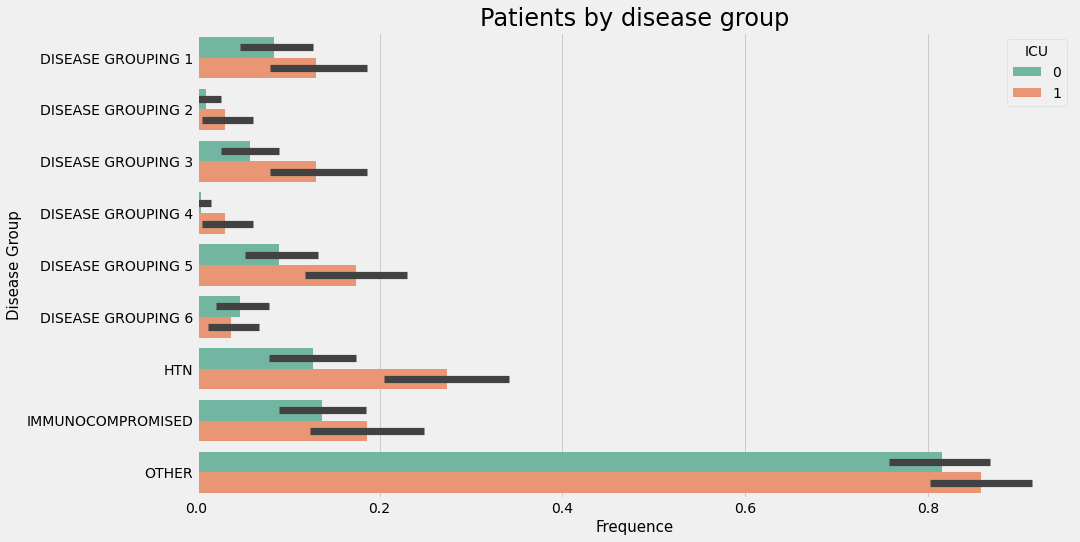

In [39]:
plt.figure(figsize=(14,8))
sns.barplot(x='value', y='variable', data= diseases.melt(id_vars='ICU'),
            hue='ICU', orient='h', palette= 'Set2')
plt.title('Patients by disease group', fontsize=24, loc='center')
plt.xlabel('Frequence', fontsize=15)
plt.ylabel('Disease Group', fontsize=15);

The same patient can be in diferent groups, however there was not information to identify it.

<a id="section-four-three"></a>
## 4.3 Vital Signs

In [40]:
vital_signs = icu_adm.iloc[:, 192:]
vital_signs.head()

,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
3,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
5,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.037037,-0.538462,-0.537736,-0.517241,-0.196429,0.815789,0.030928,-0.3750,-0.401709,-0.428571,0.252747,0.919192,-0.247863,-0.567568,-0.626866,-0.575758,-0.333333,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0


In [41]:
vital_signs.shape

(350, 37)

In [42]:
vital_signs_columns = [['BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN',
                         'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN',
                         'OXYGEN_SATURATION_MEAN']]

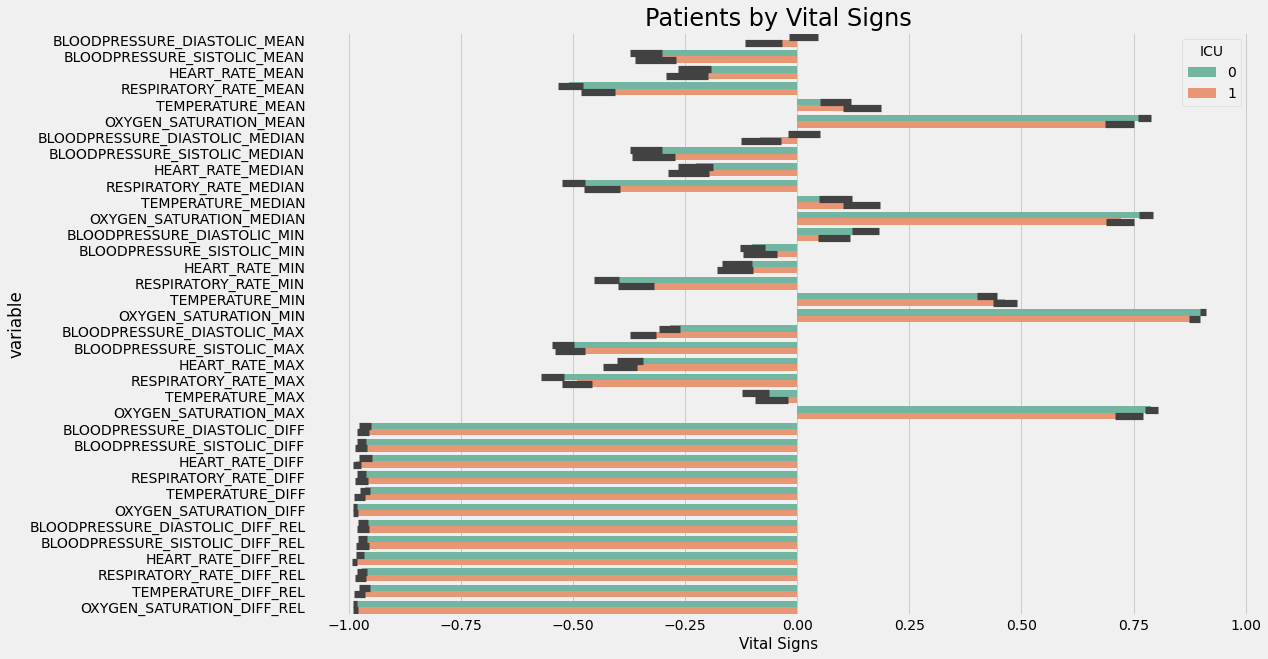

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x='value', y='variable', data= vital_signs.melt(id_vars='ICU'),
            hue='ICU',  orient='h', palette= 'Set2')
plt.title('Patients by Vital Signs', fontsize=24, loc='center')
plt.xlabel('Vital Signs', fontsize=15);

<a id="section-four-four"></a>
## 4.4 Laboratory Exams

In [44]:
lab_exams = icu_adm.iloc[:, 12:192]
lab_exams.head()

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF
0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.868365,-0.868365,-1.0,-0.742004,-0.742004,-0.742004,-0.742004,-1.0,-0.945093,-0.945093,-0.945093,-0.945093,-1.0,-0.891993,-0.891993,-0.891993,-0.891993,-1.0,0.090147,0.090147,0.090147,0.090147,-1.0,0.109756,0.109756,0.109756,0.109756,-1.0,-0.932246,-0.932246,-0.932246,-0.932246,-1.0,1.000000,1.000000,1.000000,1.000000,-1.0,-0.835844,-0.835844,-0.835844,-0.835844,-1.0,-0.914938,-0.914938,-0.914938,-0.914938,-1.0,-0.868747,-0.868747,-0.868747,-0.868747,-1.0,-0.170732,-0.170732,-0.170732,-0.170732,-1.0,-0.704142,-0.704142,-0.704142,-0.704142,-1.0,-0.77931,-0.77931,-0.77931,-0.77931,-1.0,-0.754601,-0.754601,-0.754601,-0.754601,-1.0,-0.875236,-0.875236,-0.875236,-0.875236,-1.0,0.234043,0.234043,0.234043,0.234043,-1.0,0.363636,0.363636,0.363636,0.363636,-1.0,-0.540721,-0.540721,-0.540721,-0.540721,-1.0,-0.518519,-0.518519,-0.518519,-0.518519,-1.0,0.939394,0.939394,0.939394,0.939394,-1.0,0.345679,0.345679,0.345679,0.345679,-1.0,-0.028571,-0.028571,-0.028571,-0.028571,-1.0,-0.997201,-0.997201,-0.997201,-0.997201,-1.0,-0.990854,-0.990854,-0.990854,-0.990854,-1.0,-0.825613,-0.825613,-0.825613,-0.825613,-1.0,-0.836145,-0.8361

In [45]:
lab_exams.shape

(350, 180)

### Check the variables with NULL or very low variance 

By look back the frame above we can see after some explorations that there are some variables that are the same in all exams, examples are variables follow by 'DIFF' columns.

The idea here is to remove these variables from the model, as a low_std_th ∈ [0.1] variable with the standard deviation threshold can be adjusted according to the desired criterion.

This approach was based on a notebook of another student [Bruno Fontana da Silva](https://github.com/fontanads) that was enrolled in the same ALURA Bootcamp.

In [46]:
lab_exams_diff = icu_adm.loc[:,(['BE_ARTERIAL_DIFF','UREA_DIFF','ALBUMIN_DIFF','DIMER_DIFF','BE_VENOUS_DIFF','POTASSIUM_DIFF',
               'BIC_ARTERIAL_DIFF','BIC_VENOUS_DIFF','BILLIRUBIN_DIFF','BLAST_DIFF','PLATELETS_DIFF',
               'CALCIUM_DIFF','SAT02_ARTERIAL_DIFF','SAT02_VENOUS_DIFF','CREATININ_DIFF','PH_VENOUS_DIFF',
               'FFA_DIFF','GGT_DIFF','GLUCOSE_DIFF','HEMATOCRITE_DIFF','HEMOGLOBIN_DIFF','P02_ARTERIAL_DIFF', 
               'INR_DIFF','LACTATE_DIFF','LEUKOCYTES_DIFF','LINFOCITOS_DIFF','NEUTROPHILES_DIFF',
               'P02_ARTERIAL_DIFF','P02_VENOUS_DIFF','PC02_ARTERIAL_DIFF','PC02_VENOUS_DIFF', 'PCR_DIFF',
              'PH_ARTERIAL_DIFF','TTPA_DIFF','TGP_DIFF','TGO_DIFF','SODIUM_DIFF' ])].describe().loc[['count', 'mean','std']]
lab_exams_diff

,BE_ARTERIAL_DIFF,UREA_DIFF,ALBUMIN_DIFF,DIMER_DIFF,BE_VENOUS_DIFF,POTASSIUM_DIFF,BIC_ARTERIAL_DIFF,BIC_VENOUS_DIFF,BILLIRUBIN_DIFF,BLAST_DIFF,PLATELETS_DIFF,CALCIUM_DIFF,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_DIFF,CREATININ_DIFF,PH_VENOUS_DIFF,FFA_DIFF,GGT_DIFF,GLUCOSE_DIFF,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,P02_ARTERIAL_DIFF,INR_DIFF,LACTATE_DIFF,LEUKOCYTES_DIFF,LINFOCITOS_DIFF,NEUTROPHILES_DIFF,P02_ARTERIAL_DIFF,P02_VENOUS_DIFF,PC02_ARTERIAL_DIFF,PC02_VENOUS_DIFF,PCR_DIFF,PH_ARTERIAL_DIFF,TTPA_DIFF,TGP_DIFF,TGO_DIFF,SODIUM_DIFF
count,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
mean,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
low_std_th = 0

df_std = (lab_exams).std()
lab_exams_diff = df_std[df_std <= low_std_th].loc[(slice(None))].index.tolist()
lab_exams_diff_std = list(set(lab_exams).difference(set(lab_exams_diff)))
print(f'{len(lab_exams_diff_std)} lab exams variables(of {len(lab_exams)}) do not have low dispertion')

144 lab exams variables(of 350) do not have low dispertion


In [48]:
lab_exams.drop(columns=['BE_ARTERIAL_DIFF','UREA_DIFF','ALBUMIN_DIFF','DIMER_DIFF','BE_VENOUS_DIFF','POTASSIUM_DIFF',
               'BIC_ARTERIAL_DIFF','BIC_VENOUS_DIFF','BILLIRUBIN_DIFF','BLAST_DIFF','PLATELETS_DIFF',
               'CALCIUM_DIFF','SAT02_ARTERIAL_DIFF','SAT02_VENOUS_DIFF','CREATININ_DIFF','PH_VENOUS_DIFF',
               'FFA_DIFF','GGT_DIFF','GLUCOSE_DIFF','HEMATOCRITE_DIFF','HEMOGLOBIN_DIFF','P02_ARTERIAL_DIFF', 
               'INR_DIFF','LACTATE_DIFF','LEUKOCYTES_DIFF','LINFOCITOS_DIFF','NEUTROPHILES_DIFF',
               'P02_ARTERIAL_DIFF','P02_VENOUS_DIFF','PC02_ARTERIAL_DIFF','PC02_VENOUS_DIFF', 'PCR_DIFF',
              'PH_ARTERIAL_DIFF','TTPA_DIFF','TGP_DIFF','TGO_DIFF','SODIUM_DIFF'], axis=1,  inplace=True)
lab_exams.head()

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX
0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.742004,-0.742004,-0.742004,-0.742004,-0.945093,-0.945093,-0.945093,-0.945093,-0.891993,-0.891993,-0.891993,-0.891993,0.090147,0.090147,0.090147,0.090147,0.109756,0.109756,0.109756,0.109756,-0.932246,-0.932246,-0.932246,-0.932246,1.000000,1.000000,1.000000,1.000000,-0.835844,-0.835844,-0.835844,-0.835844,-0.914938,-0.914938,-0.914938,-0.914938,-0.868747,-0.868747,-0.868747,-0.868747,-0.170732,-0.170732,-0.170732,-0.170732,-0.704142,-0.704142,-0.704142,-0.704142,-0.77931,-0.77931,-0.77931,-0.77931,-0.754601,-0.754601,-0.754601,-0.754601,-0.875236,-0.875236,-0.875236,-0.875236,0.234043,0.234043,0.234043,0.234043,0.363636,0.363636,0.363636,0.363636,-0.540721,-0.540721,-0.540721,-0.540721,-0.518519,-0.518519,-0.518519,-0.518519,0.939394,0.939394,0.939394,0.939394,0.345679,0.345679,0.345679,0.345679,-0.028571,-0.028571,-0.028571,-0.028571,-0.997201,-0.997201,-0.997201,-0.997201,-0.990854,-0.990854,-0.990854,-0.990854,-0.825613,-0.825613,-0.825613,-0.825613,-0.836145,-0.836145,-0.836145,-0.836145,-0.994912,-0.994912,-0.994912,-0.994912
2,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.317073,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.742004,-0.742004,-0.742004,-0.742004,-0.958528,-0.958528,-0.958528,-0.958528,-0.780261,-0.780261,-0.780261,-0.780261,0.144654,0.144654,0.144654,0.144654,0.158537,0.158537,0.158537,0.158537,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.382773,-0.382773,-0.382773,-0.382773,-0.908714,-0.90

In [49]:
lab_exams.shape

(350, 144)

**After work out we eliminate 36 variables from the 'lab_exams' group that present a low standard deviation = 0, the variables are printed bellow**

In [50]:
#Features deleted
lab_exams_diff

['ALBUMIN_DIFF',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_DIFF',
 'BLAST_DIFF',
 'CALCIUM_DIFF',
 'CREATININ_DIFF',
 'FFA_DIFF',
 'GGT_DIFF',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_DIFF',
 'INR_DIFF',
 'LACTATE_DIFF',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_DIFF',
 'PCR_DIFF',
 'PH_ARTERIAL_DIFF',
 'PH_VENOUS_DIFF',
 'PLATELETS_DIFF',
 'POTASSIUM_DIFF',
 'SAT02_ARTERIAL_DIFF',
 'SAT02_VENOUS_DIFF',
 'SODIUM_DIFF',
 'TGO_DIFF',
 'TGP_DIFF',
 'TTPA_DIFF',
 'UREA_DIFF',
 'DIMER_DIFF']

<a id="section-four-five"></a>
## 4.5 Feature Engineering new dataframes
It is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will create different Dataframes and encode the variable 'AGE_PERCENTIL'.

Make diferent copies of the DataFrame before train the models considering the features of each copy.

* icu1 = Vital Signs + Demographic features

* icu2 = Laboratory exams + Demographic features

* icu3 = Comorbidities + Demographic features

I had implemented in these three datasets experimental machine learning models to see how it behaves.
Link: [Optional models](http://localhost:8888/notebooks/Bootcamp%20Alura/Optional%20models.ipynb)

In [51]:
# Model icu1 (Vital Signs + Demographic features)
icu_vital_signs = pd.DataFrame(vital_signs)
icu_vital_signs.drop(['ICU'], inplace=True, axis=1)

icu_demographic_feature = pd.DataFrame(demographic_feature)
icu_demographic_feature = encode_feature(demographic_feature)
icu_demographic_feature.drop(columns=['AGE_PERCENTIL'], axis=1, inplace=True)

icu1 = pd.concat([icu_vital_signs, icu_demographic_feature], axis=1)
icu1.to_csv('vital_signsAndDemographic.csv')

In [52]:
# Model icu2 (Lab exams + Demographic features)
icu_lab_exams = pd.DataFrame(lab_exams)

icu_demographic_feature = pd.DataFrame(demographic_feature)
icu_demographic_feature = encode_feature(demographic_feature)
icu_demographic_feature.drop(columns=['AGE_PERCENTIL'], axis=1, inplace=True)

icu2 = pd.concat([icu_lab_exams, icu_demographic_feature], axis=1)
icu2.to_csv('lab_examsDemographic.csv')

In [53]:
#Model icu3 (Comorbidities + Demographic features)
icu_diseases = pd.DataFrame(diseases)
icu_diseases.drop(['ICU'], inplace=True, axis=1)

icu_demographic_feature = pd.DataFrame(demographic_feature)
icu_demographic_feature = encode_feature(demographic_feature)
icu_demographic_feature.drop(columns=['AGE_PERCENTIL'], axis=1, inplace=True)

icu3 = pd.concat([icu_diseases, icu_demographic_feature], axis=1)
icu3.to_csv('diseasesDemographic.csv')

<a id="section-five"></a>
# 5. Machine Learning Models - Part 1

Train the models without touch in the High correlation.

Run models in the full dataset to see how the models perform.

Before train a model we need to Feature Encodding the 'Age Percentil' otherwise if you just turn 10th into 10 (int), you incur two things: the data will have a non-normalized column, after all the rest of the data is normalized. The other problem is that they end up with heavier weights according to the age group.


In [54]:
# Make a copy of the dataframe
icu_full = icu_adm.copy()
icu_full.shape

(350, 229)

In [55]:
# Encode Age percentil, and drop the original feature
icu_full = encode_feature(icu_full)
icu_full.drop(columns=['AGE_PERCENTIL'], axis=1, inplace=True)
icu_full.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,0,0,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-

<a id="section-five-one"></a>
## 5.1Train and compare Test Accuracy

By using the full dataset and partitioned in training and testing, with a loop, we will obtain the results of each model for a given set of past data. The idea is just to have an initial insite of how the data is working, if right away, they are already training well, so more specific parameters are not passed for each model.
* DummyClassifier      
* LogisticRegression    
* GaussianNB           
* SVC                    
* RandomForestClassifier 
* GradientBoostingClassifier

Finally, we have the output of a list with the AUC values and standard deviation (STD).

In [56]:
run_test_models(icu_full)

['DummyClassifier        AUC:                0.509 STD: 0.03',
 'LogisticRegression     AUC:                0.732 STD: 0.03',
 'GaussianNB             AUC:                0.707 STD: 0.06',
 'SVC                    AUC:                0.772 STD: 0.06',
 'RandomForestClassifier AUC:                0.752 STD: 0.03',
 'GradientBoostingClassifier AUC:                0.746 STD: 0.04']


### Train models Random Forest Classifier, and SVC

**As these were the models that return the best AUC and STD**


The overall _accuracy_ represents the total number of correct classifications across all behaviours. This can be useful when it is equally important to correctly classify each behaviour. On the contrary, if one or more behaviours are of particular interest to the observer (e.g., not admitted to ICU and admitted to ICU), and the priority is to correctly classify them. Then _precision_, _recall_ and specificity give a more adequate representation of the classifier performance. 

Finally, the _F1-score_ is calculated as the harmonic mean of precision and recall and combines precision and recall into one numerical measure. It reaches its best score at 1 and worst score at 0.

The 10-fold cross-validation was utilised as 10 has been shown to be a good and reasonable compromise between providing robust performance estimates and being computationally feasible, because the computational resource and time required increase with the number of iterations. Different folds were tried to check the robustness of the predictions; however, there was no change in results.

<a id="section-five-two"></a>
## 5.2 Random Forest Classifier

In [57]:
#Work with full dataframe before remove high correlated features
X_columns = icu_full.columns
y = icu_full['ICU']
X = icu_full[X_columns].drop(['ICU'], axis=1)

#Split train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state= 67235)

### Apply GridSearchCV to find the best parameters for the model

In [ ]:
parameters = {
            'n_estimators':[5,10,20], 
            'criterion':['entropy', 'gini'],
            'max_depth':[1,2,3,4,5,6,7,8,9,10],
            'max_features':['sqrt','log2', 'auto'],
            'bootstrap': ['True', 'False'],
            'oob_score': ['True', 'False']  
}

grid_search_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'accuracy')
grid_search_cv.fit(X_train, y_train)

In [58]:
grid_search_cv.best_estimator_

In [59]:
grid_search_cv.best_score_

###  Hyperparameter Tuning:

Train Random Forest Classifier using the best estimator

#### rfc_1 model

In [60]:
rfc_1 = RandomForestClassifier(bootstrap='False', max_depth=5, max_features='log2',
                       n_estimators=20, oob_score='False', random_state=67235)
rfc_1.fit(X_train,y_train)
rfc_1.score(X_train, y_train)

0.875

In [61]:
y_pred = rfc_1.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        38
           1       0.69      0.62      0.66        32

    accuracy                           0.70        70
   macro avg       0.70      0.69      0.69        70
weighted avg       0.70      0.70      0.70        70



#### rfc model

In [62]:
rfc = RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=8,
                       max_features='log2', n_estimators=20, oob_score='False', random_state=67235)
rfc.fit(X_train,y_train)
rfc.score(X_train, y_train)

0.9642857142857143

In [63]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        38
           1       0.71      0.53      0.61        32

    accuracy                           0.69        70
   macro avg       0.69      0.67      0.67        70
weighted avg       0.69      0.69      0.68        70



#### rfc_2 model

In [64]:
rfc_2 = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=25, random_state=67235)
rfc_2.fit(X_train,y_train)
rfc_2.score(X_train, y_train)

0.9107142857142857

In [65]:
y_pred = rfc_2.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.72      0.72      0.72        32

    accuracy                           0.74        70
   macro avg       0.74      0.74      0.74        70
weighted avg       0.74      0.74      0.74        70



### Cross Validation model rfc_2

In [66]:
run_cross_validation(rfc_2, icu_full, 5, 10);

Mean AUC test 0.7685948717948717 - Mean AUC train 0.9961781728403253


### Confusion matrix model rfc_2
Confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true or actual values are known.

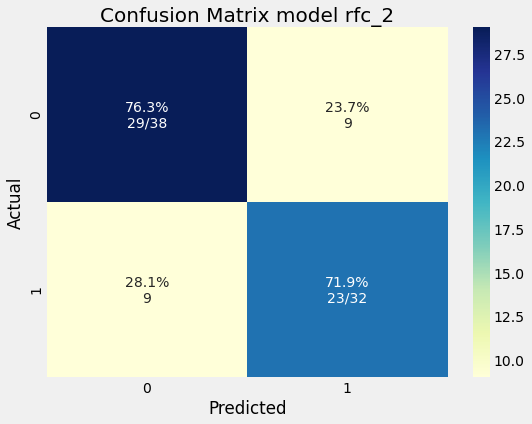

In [67]:
plot_cm(y_test, y_pred, figsize=(8, 6))
plt.title('Confusion Matrix model rfc_2', fontsize=20)
plt.savefig('cm_rfc_2.png')

* Looking at the bottom line of the matrix, for Random Forest Classifier, a higher PV (71.9%) value is optimal and means that the model is able to predict patients who will need an ICU, while a high FN (28.1%) value is bad, as it indicates that the model predicted that the patient would not need to go to the ICU, when in fact he will. In this particular case the model faill with 9 patients from the sample, which is not optimal expected because we are dealing with human live.

* In the top line, the model identify correctly (76.3%) of those who do not need an ICU, the model pedict that 9 patients (23.7%) will need ICU but in fact he does not.


### AUC - ROC CURVE model rfc_2

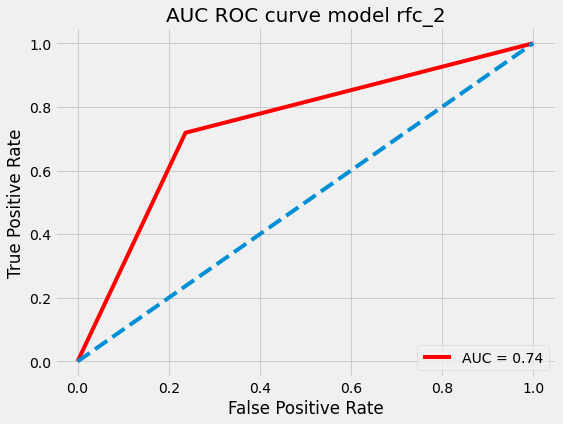

In [68]:
ROC(y_test, y_pred)
plt.title('AUC ROC curve model rfc_2', fontsize=20)
plt.savefig('roc_curve_rfc_2.png')

<a id="section-five-three"></a>
## 5.3 SVC - Support Vector Machine

A support vector machine is a type of non-probabilistic classifier that maps its  features into a high-dimensional feature space, where each dimension represents one of the classification features. Support vector machines try to create a linear partition of the high-dimensional feature space into two subspaces. New, unseen data samples are later evaluated against this partition to determine their class membership. This method is non-probabilistic, because the features in the unseen data samples fully determine its location in the feature space of the support vector machine model.

###  Hyperparameter Tuning

With K-fold cross validation(where K=10)

In [ ]:
tune_parameters = {
            'C': [0.01, 1, 5],
            'coef0': [1.0, 5.0, 10.0],
            'degree': [1,2,3,4,5],
            'gamma': ['scale', 'auto', 0.1, 1],
            'kernel': ['poly','linear','sigmoid'],
            'probability': [True, False]
            }

grid_search_cv = GridSearchCV(SVC(),tune_parameters, scoring = 'accuracy', cv=10)
grid_search_cv.fit(X_train, y_train)

In [69]:
grid_search_cv.best_estimator_

In [70]:
grid_search_cv.best_score_

### Train SVC model using the best tune parameters

#### svm_tuned model

In [71]:
svm_tuned = SVC(C=10, coef0=10.0, degree=25, gamma=0.1, kernel='linear', random_state=62375)
svm_tuned.fit(X_train,y_train)
train_score = svm_tuned.score(X_train, y_train)
train_score

0.7928571428571428

In [72]:
y_pred = svm_tuned.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        38
           1       0.65      0.69      0.67        32

    accuracy                           0.69        70
   macro avg       0.68      0.69      0.68        70
weighted avg       0.69      0.69      0.69        70



#### svm model

In [73]:
svm = SVC(C=5, coef0=1.0, degree=4, gamma='auto', kernel='poly', probability=False, random_state=62375)
svm.fit(X_train,y_train)
train_score = svm.score(X_train, y_train)
train_score

0.7892857142857143

In [74]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.72      0.72      0.72        32

    accuracy                           0.74        70
   macro avg       0.74      0.74      0.74        70
weighted avg       0.74      0.74      0.74        70



### Cross Validation svm model

In [75]:
run_cross_validation(svm, icu_full, 5, 10);

Mean AUC test 0.7447514474772539 - Mean AUC train 0.8785372027483404


### Confusion Matrix svm model

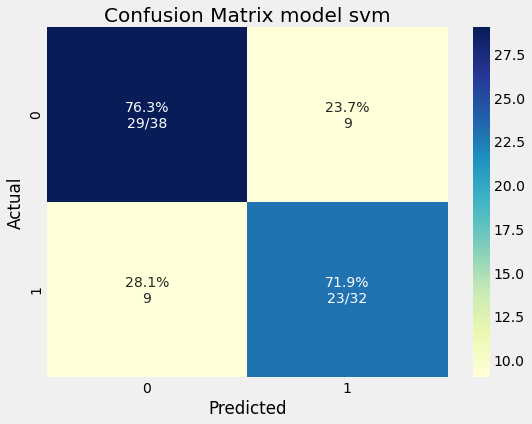

In [76]:
plot_cm(y_test, y_pred, figsize=(8,6))
plt.title('Confusion Matrix model svm', fontsize=20)
plt.savefig('cm_svm.png')

Looking at the bottom line of the matrix, for SVC model, a higher PV (68.8%) value is optimal and means that the model is able to predict patients who will need an ICU, while a high FN (28.1%) value is bad, as it indicates that the model predicted that the patient would not need to go to the ICU, when in fact he will. In this particular case the model faill with 10 patients from the sample, which is not optimal expected because we are dealing with human live.

In the top line, the model identify correctly (76.3%) of those who do not need an ICU, the model pedict that 9 patients (23.7%) will need ICU but in fact he does not.

###  AUC - ROC CURVE svm model

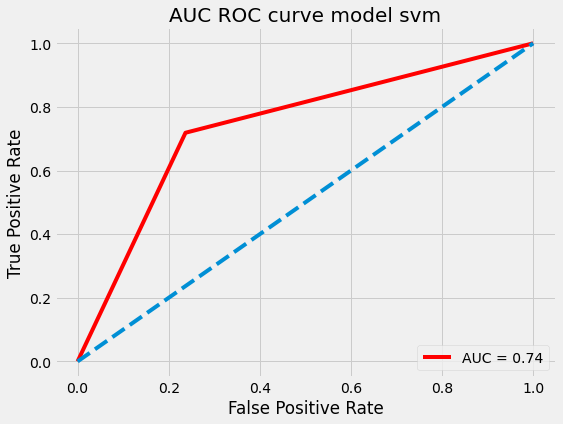

In [77]:
ROC(y_test, y_pred)
plt.title('AUC ROC curve model svm', fontsize=20)
plt.savefig('auc_curve_svm.png')

<a id="section-five-four"></a>
## 5.4 Conclusion Part 1 (dataset called icu_full)

Dataset keep allf the features, move from 229 to 238 after Feature Encodding the 'Age Percentil' and drop the original column without touch in the High correlation features.
 
Apply hyperparameters in the two best model performance that are Random Forest Classifier and SVC models wich return a respectivelly AUC of 0.752 and 0.772, Standart deviation of 0.03 and 0.06.

Run the tuned models with different parameters and end up with the best model been:

### SVC - Support Vector Machine

Using the hyperparameters:

__C=5'__

__coef0=1.0__

__degree=4'__

__gamma='auto'__

__kernel='poly'__

__probability=False__

Test Accuracy 0f 0.74%

Mean AUC test 0.7494971050454922 - Mean AUC train 0.880377749677507

In [78]:
models_name = ['RandomForestClassifier', 'SVC']
models = [rfc_2, svm]

def compare_roc_curves(X_train, y_train, X_test, y_test, models):
    fig, ax = plt.subplots(figsize=(10,8))
    
    for model in models:   
        model.fit(X_train, y_train)
        plot_roc_curve(model, X_test, y_test, ax=ax)
     
        ax.grid(linestyle='--')
        ax.set_ylabel('TPR', fontsize=18)
        ax.set_xlabel('FPR', fontsize=18)
        ax.set_title('Compare ROC curves - Test set', fontsize=18)
        ax.legend(bbox_to_anchor=(1,1), fontsize='large', title='Classifiers:', title_fontsize=18, labelspacing=0.8);  


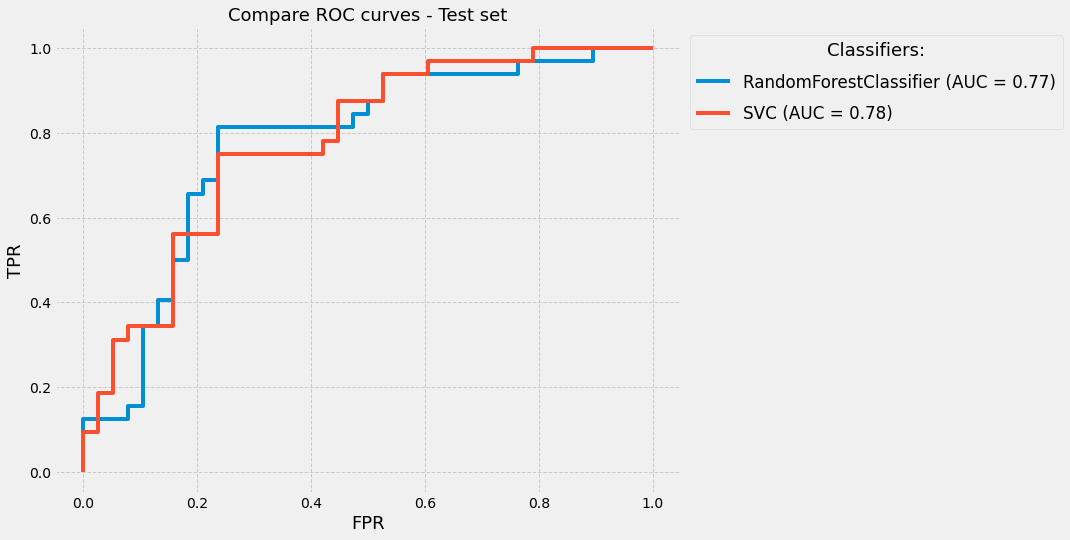

In [79]:
compare_roc_curves(X_train, y_train, X_test, y_test, models)
plt.savefig('compare_models_p1.png')

## Learning curve performance of Train and Test SVC best model applied

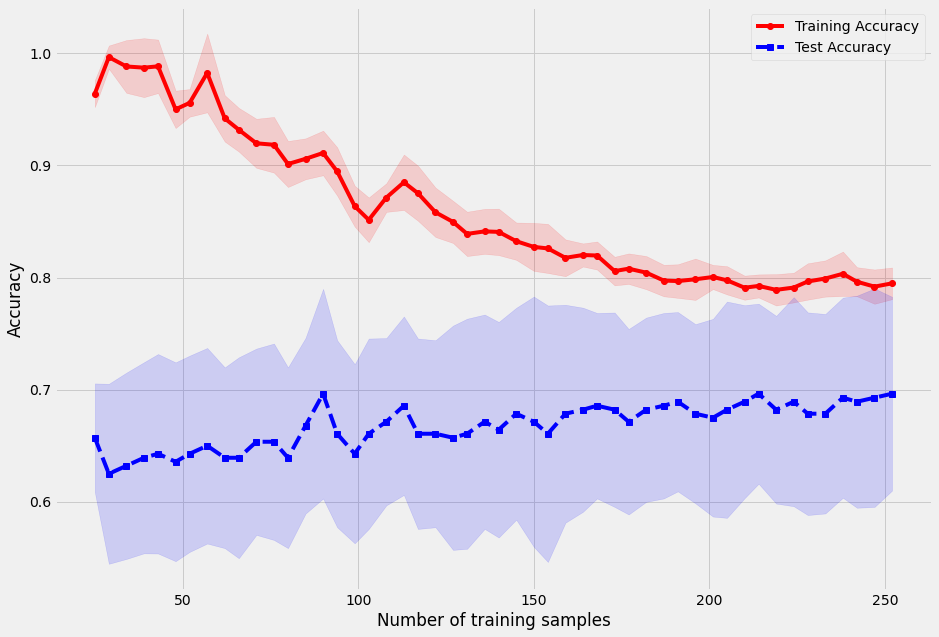

<Figure size 432x288 with 0 Axes>

In [80]:
train_sizes, train_scores, test_scores = learning_curve(estimator=svm, X=X_train,y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0), cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
fig, axes = plt.subplots(figsize=(14, 10))
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('train_test_accuracy_svc_p1.png')

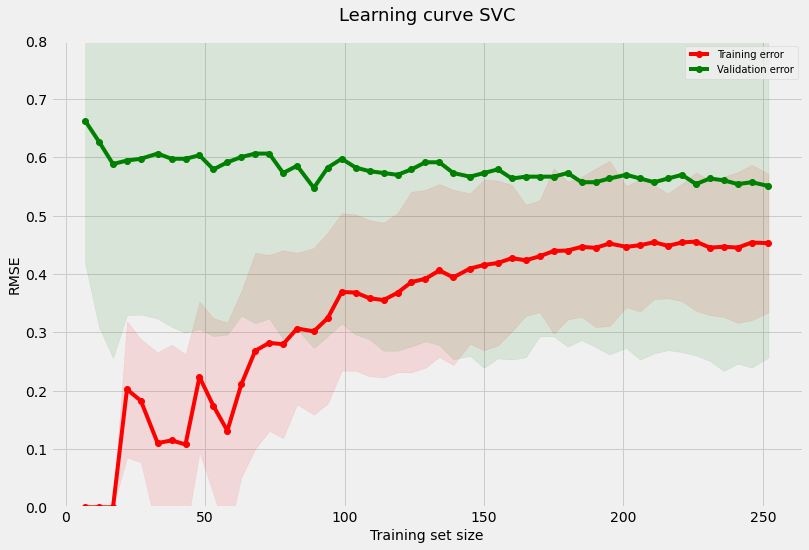

In [81]:
fig, axes = plt.subplots(figsize=(12, 8))
title = 'Learning curve SVC'
learning_curves(svm, title, X_train, y_train, cv=10)
plt.savefig('learning_curve_svm.png')

## Evaluate Permutation Importance for SVC model

In [82]:
perm = PermutationImportance(svm, scoring = 'recall', random_state=67235).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=20)

Weight,Feature
0.1062 ± 0.0306,AGE_PERCENTIL_Above 90th
0.0500 ± 0.0637,AGE_ABOVE65
0.0312 ± 0.0000,CALCIUM_MAX
0.0312 ± 0.0000,CALCIUM_MEAN
0.0312 ± 0.0000,HEART_RATE_MEAN
0.0312 ± 0.0000,HEART_RATE_MEDIAN
0.0312 ± 0.0000,HEART_RATE_MIN
0.0312 ± 0.0000,OXYGEN_SATURATION_MEAN
0.0312 ± 0.0000,DISEASE GROUPING 2
0.0312 ± 0.0000,OXYGEN_SATURATION_MAX


<a id="section-six"></a>
# 6. High Correlated columns

### Remove features with high correlation that lead to multicollinearity

**Multicollinearity** is a phenomenon that occurs when one of the explanatory variables is corrected with another explanatory variable. The negative point is that the statistical significance of the regression coefficients is inflated because of these correlations. So, the coefficient cannot be used to directly explain the influence of that variable on the behavior of the dependent variable.

One way to minimize the effects of multicollinearity is to remove strongly correlated variables from the model to facilitates the analysis process to find the variables that can cause this effect.

Here I use the abs() function  to eliminate the negative numbers in the correlation matrix.

In [83]:
correlated_columns(icu_adm)

,level_0,level_1,pearson
3,ALBUMIN_MAX,ALBUMIN_MEDIAN,1.000000
4,ALBUMIN_MAX,ALBUMIN_MEAN,1.000000
5,ALBUMIN_MAX,ALBUMIN_MIN,1.000000
9,BE_ARTERIAL_MAX,BE_ARTERIAL_MEDIAN,1.000000
10,BE_ARTERIAL_MAX,BE_ARTERIAL_MEAN,1.000000
...,...,...,...
273,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_DIASTOLIC_DIFF,0.958362
274,BLOODPRESSURE_SISTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF,0.988304
275,RESPIRATORY_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF,0.967933
276,TEMPERATURE_DIFF_REL,TEMPERATURE_DIFF,0.999509


In [84]:
icu_adm_no_correlation=remove_corr_var(icu_adm,0.95)
icu_adm_no_correlation.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_DIFF,LACTATE_MEDIAN,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_DIFF,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,-1.0,1.000000,-1.0,-0.835844,-1.0,-0.914938,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.875236,-1.0,0.234043,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,-0.959849,-1.0,1.000000,-1.0,-0.382773,-1.0,-0.908714,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.939887,-1.0,0.234043,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,-0.961262,1
3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,-0.959849,-1.0,-0.828421,-1.0,-0.729239,-1.0,-0.836100,-1.0,-1.0,-0.170732,-1.0,-0.633136,-1.0,-0.77931,-1.0,-0.779141,-1.0,-0.503592,-1.0,0.234043,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,-0.959849,-1.0,1.000000,-1.0,-0.702202,-1.0,-0.641079,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.990926,-1.0,0.234043,-1.0,0.363636,-1.0,-0.4

In [85]:
correlated_features = icu_adm_no_correlation.iloc[:, 12:].columns.tolist()
correlated_features.remove('ICU')

### Plot correlation matrix after cleaned dataset

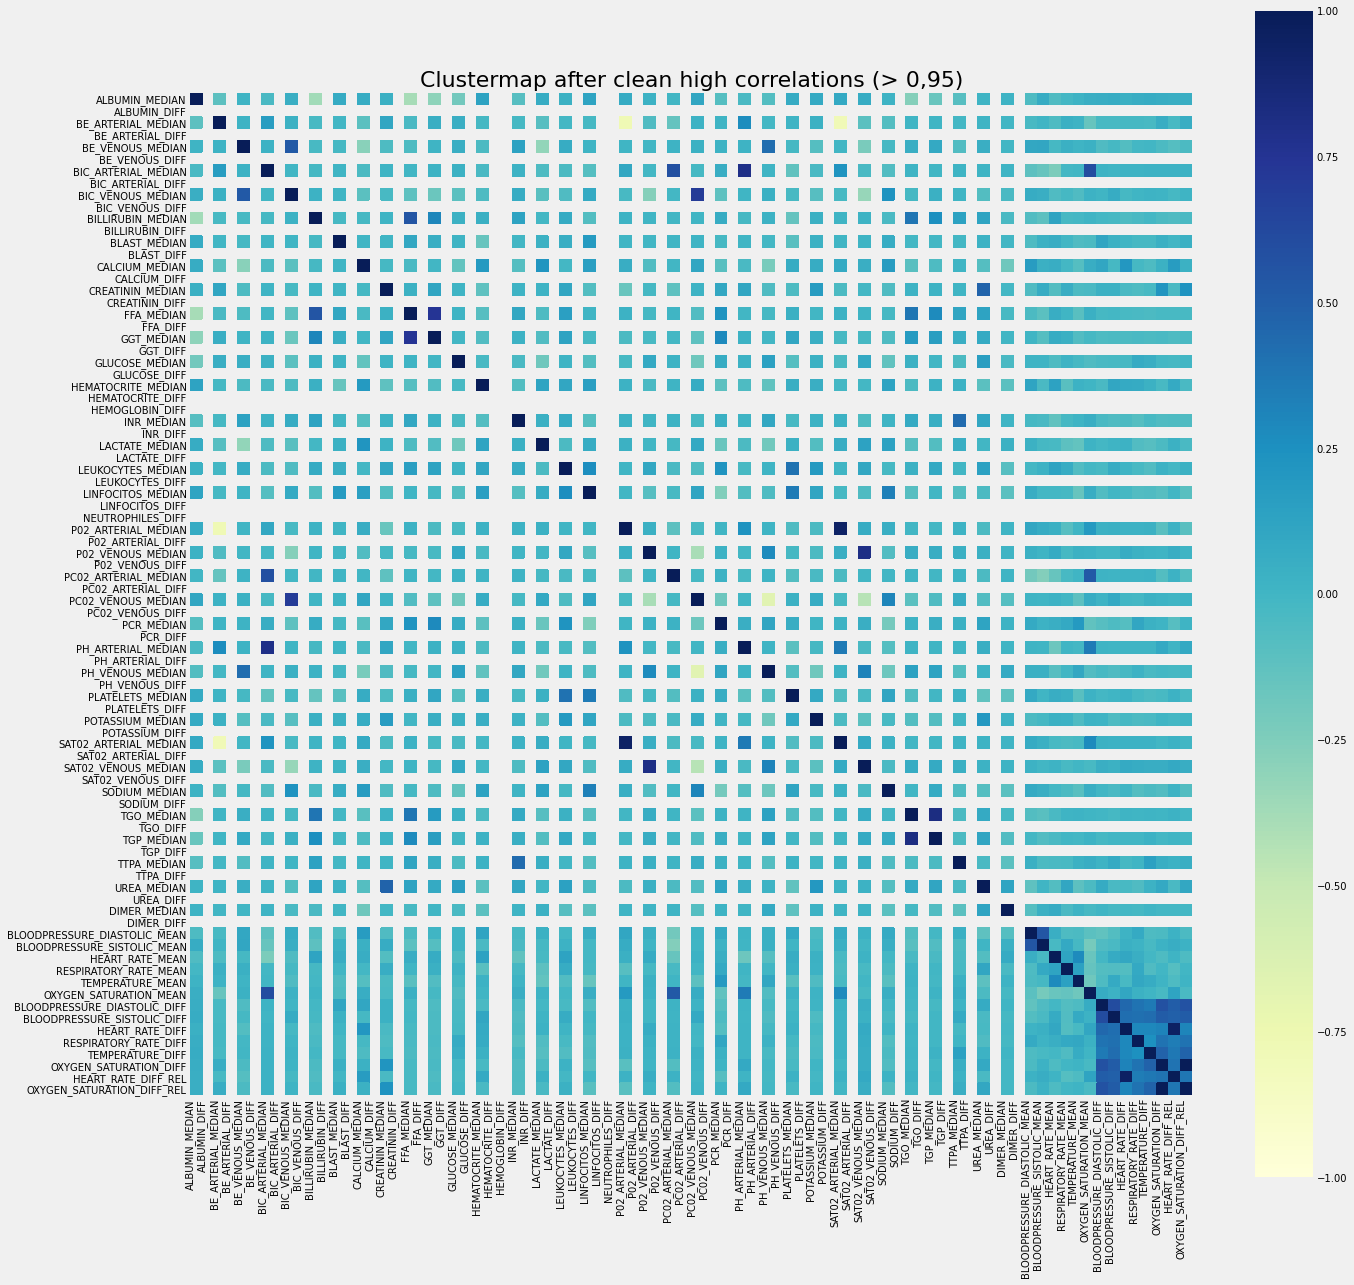

In [86]:
corr_matrix = icu_adm_no_correlation[correlated_features].corr()

plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap='YlGnBu',
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

ax.set_title('Clustermap after clean high correlations (> 0,95)', fontsize= 22)

plt.show()

In [87]:
icu_adm_read = icu_adm_no_correlation.drop(['GENDER'], axis=1)
icu_adm_read.head()

,AGE_ABOVE65,AGE_PERCENTIL,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_DIFF,LACTATE_MEDIAN,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_DIFF,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,-1.0,1.000000,-1.0,-0.835844,-1.0,-0.914938,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.875236,-1.0,0.234043,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,-0.959849,-1.0,1.000000,-1.0,-0.382773,-1.0,-0.908714,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.939887,-1.0,0.234043,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,-0.961262,1
3,0,40th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,-0.959849,-1.0,-0.828421,-1.0,-0.729239,-1.0,-0.836100,-1.0,-1.0,-0.170732,-1.0,-0.633136,-1.0,-0.77931,-1.0,-0.779141,-1.0,-0.503592,-1.0,0.234043,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,0,10th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,-0.959849,-1.0,1.000000,-1.0,-0.702202,-1.0,-0.641079,-1.0,-1.0,-0.170732,-1.0,-0.704142,-1.0,-0.77931,-1.0,-0.754601,-1.0,-0.990926,-1.0,0.234043,-1.0,0.363636,-1.0,-0.457944,-1.0,-0.5

In [88]:
icu_adm_read.drop(columns=['BE_ARTERIAL_DIFF','UREA_DIFF','ALBUMIN_DIFF','DIMER_DIFF','BE_VENOUS_DIFF','POTASSIUM_DIFF',
               'BIC_ARTERIAL_DIFF','BIC_VENOUS_DIFF','BILLIRUBIN_DIFF','BLAST_DIFF','PLATELETS_DIFF',
               'CALCIUM_DIFF','SAT02_ARTERIAL_DIFF','SAT02_VENOUS_DIFF','CREATININ_DIFF','PH_VENOUS_DIFF',
               'FFA_DIFF','GGT_DIFF','GLUCOSE_DIFF','HEMATOCRITE_DIFF','HEMOGLOBIN_DIFF','P02_ARTERIAL_DIFF', 
               'INR_DIFF','LACTATE_DIFF','LEUKOCYTES_DIFF','LINFOCITOS_DIFF','NEUTROPHILES_DIFF',
               'P02_ARTERIAL_DIFF','P02_VENOUS_DIFF','PC02_ARTERIAL_DIFF','PC02_VENOUS_DIFF', 'PCR_DIFF',
              'PH_ARTERIAL_DIFF','TTPA_DIFF','TGP_DIFF','TGO_DIFF','SODIUM_DIFF'], axis=1,  inplace=True)


###  Feature Encodding 

Before train a model we need to Feature Encodding the 'Age Percentil'again as support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.

In [89]:
# Encode Age percentil, and drop the original feature
icu_adm_read = encode_feature(icu_adm_read)
icu_adm_read.drop(columns=['AGE_PERCENTIL'], axis=1, inplace=True)

In [90]:
icu_adm_read.head()

,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,0,0,0,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,-0.932246,1.000000,-0.835844,-0.914938,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,-0.959849,1.000000,-0.382773,-0.908714,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,-0.961262,1
3,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.959849,-0.828421,-0.729239,-0.836100,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,-0.959849,1.000000,-0.702202,-0.641079,-0.170732,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,-0.980333,0
5,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,-0.959849,1.000000,-0.706450,-0.340249,-0.170732,-0.704142,-0.77931,-0.754601,-0.997732,0.234043,0.363636,-0.292390,-0.666667,0.939394,0.345679,0.085714,-0.997947,-0.988948,-0.846633,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,-0.980129,0


<a id="section-seven"></a>
# 7. Building Models - Part 2

Run models in the clean and read to proceed dataset to see how the models perform.


In [91]:
print(f'The final dataframe has {icu_adm_read.shape[0]} rows and {icu_adm_read.shape[1]} columns')

The final dataframe has 350 rows and 69 columns


###  Run the Models 
To decide the better performance

* Dummy Classifier        
* Logistic Regression    
* Nayve Bayes            
* SVC                    
* Random Forest Classifier 
* Gradient Boosting Classifier 

In [92]:
run_test_models(icu_adm_read)

['DummyClassifier        AUC:                0.509 STD: 0.03',
 'LogisticRegression     AUC:                0.737 STD: 0.03',
 'GaussianNB             AUC:                0.702 STD: 0.07',
 'SVC                    AUC:                0.761 STD: 0.05',
 'RandomForestClassifier AUC:                0.772 STD: 0.02',
 'GradientBoostingClassifier AUC:                0.741 STD: 0.04']

This time working with only 69 fetures the __Random Forest__ has a similar accuracy and __SVC__ behave better than others, so I will try to tunning both and see if we can increase their accuracy performance.

<a id="section-seven-one"></a>
## 7.1 Random Forest Classifier

In [93]:
X_columns = icu_adm_read.columns
y = icu_adm_read['ICU']
X = icu_adm_read[X_columns].drop(['ICU'], axis=1)

#Split train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state= 67235)

###  Hyperparameter Tuning

In [ ]:
parameters_rfc2 = {
            'n_estimators':[5,10,20], 
            'criterion':['entropy', 'gini'],
            'max_depth':[1,2,3,4,5,6,7,8,9,10],
            'max_features':['sqrt','log2', 'auto'],
            'bootstrap': ['True', 'False'],
            'oob_score': ['True', 'False'],   
}


grid_search_cv = GridSearchCV(RandomForestClassifier(), parameters_rfc2, scoring = 'accuracy')
grid_search_cv.fit(X_train, y_train)

In [94]:
grid_search_cv.best_estimator_

In [95]:
grid_search_cv.best_score_

### Model Tunned

#### rf model

In [96]:
rf=RandomForestClassifier(bootstrap='True', max_depth=3, max_features='sqrt',
                       n_estimators=5, oob_score='False', random_state=67235)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.7607142857142857

In [97]:
y_pred = rf.predict(X_test)
print (classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.81      0.69      0.75        32

    accuracy                           0.79        70
   macro avg       0.79      0.78      0.78        70
weighted avg       0.79      0.79      0.78        70



#### rfc2 model

In [98]:
rfc2=RandomForestClassifier(bootstrap='True', criterion='entropy', max_depth=4,
                       max_features='log2', n_estimators=5, oob_score='True', random_state=67235)
rfc2.fit(X_train, y_train)
rfc2.score(X_train, y_train)

0.8071428571428572


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [99]:
y_pred = rfc2.predict(X_test)
print (classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        38
           1       0.78      0.78      0.78        32

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



###  Confusion Matrix rfc2 model

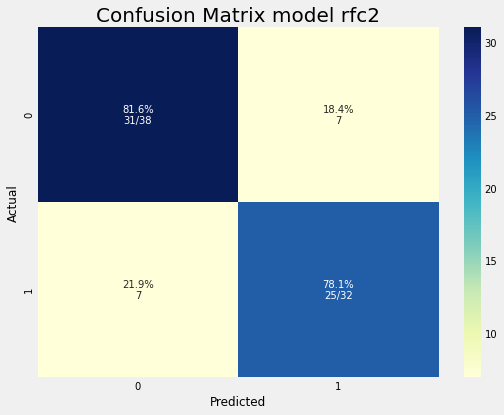

In [100]:
plot_cm(y_test, y_pred, figsize=(8,6))
plt.title('Confusion Matrix model rfc2', fontsize=20)
plt.savefig('cm_rfc2.png')

### Cross Validation rfc2 model

In [101]:
run_cross_validation(rfc2, icu_adm_read, 5, 10);

Mean AUC test 0.7115842018196856 - Mean AUC train 0.8993302519689048


###  ROC Curve rfc2 model

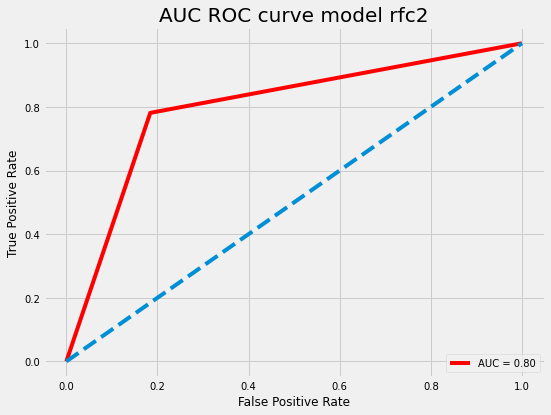

In [102]:
ROC(y_test, y_pred)
plt.title('AUC ROC curve model rfc2', fontsize=20)
plt.savefig('auc_roc_curve_rfc2.png')

### Learning curve rfc2 model

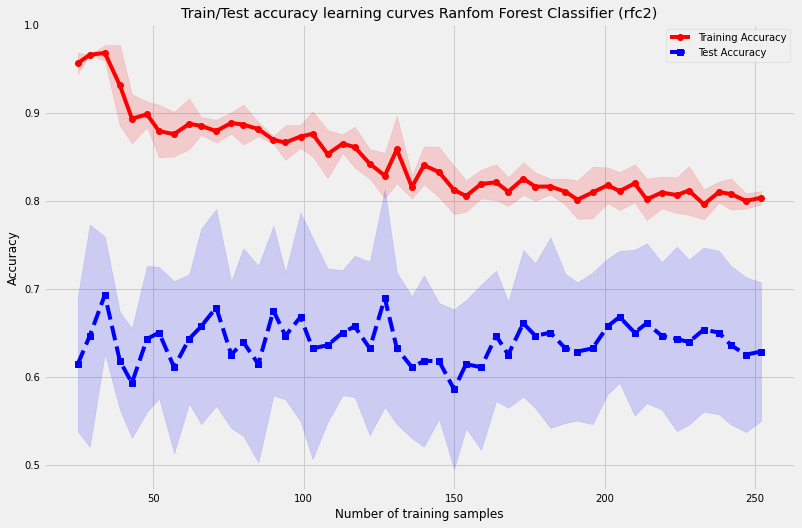

<Figure size 432x288 with 0 Axes>

In [103]:
train_sizes, train_scores, test_scores = learning_curve(estimator=rfc2, X=X_train,y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0), cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
fig, axes = plt.subplots(figsize=(12, 8))
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Train/Test accuracy learning curves Ranfom Forest Classifier (rfc2)')
plt.legend()
plt.show()
plt.savefig('train_test_accuracy_learn_curve_rfc2.png')

### Learning curve - Training vs Validation error

The learning curve plots the number of training samples on the horizontal axis and the score of an indicator (such as RSME) on the vertical axis. It shows how the indicator changes as the sample size changes. We can examine over-fitting and under-fitting by comparing the learning curves between the training set and the validation set. It also allows us to examine whether or not it is worth adding more samples to the current data, which may provide useful suggestions for continued data collection.

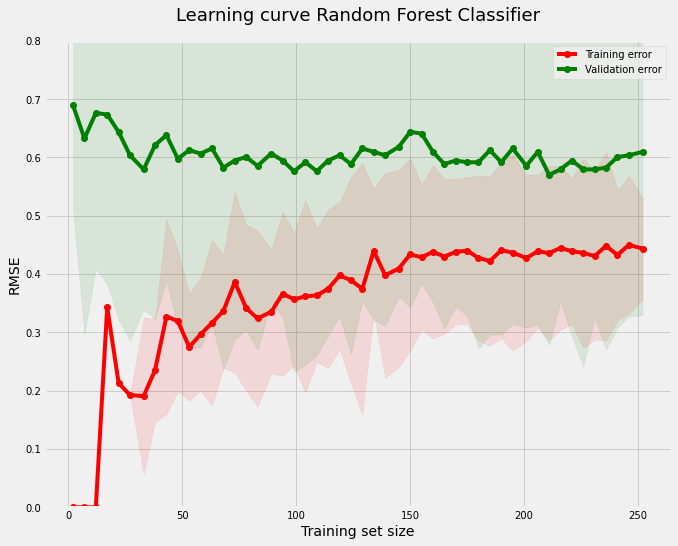

In [104]:
fig, axes = plt.subplots(figsize=(10, 8))
title = 'Learning curve Random Forest Classifier'
learning_curves(rfc2, title, X_train, y_train, cv=10)
plt.savefig('learning_curve_rfc2.png')

The graph shows an upward trend for the Training set, and a downward trend for the Validation set. This is a typical learning curve.
As you can see, in the Training set, when the size is small, we can find parameters that fit the data with a spike around a size training of 20 and return to fit the data untill size 50, so there are fewer errors. On the other hand, the parameters are tuned only for the Training set, so the Validation set has poor fits and large errors.

As the size increases, the training set's over-fitting is mitigated, resulting in a worse fit to the Training set and a better fit of the Validation set.

If the two remain far apart even after increasing the size, we can say that there is still over-fitting. In this figure, the two sets are gradually getting closer to each other, so we can expect a better fit if we increase the sample size. 

<a id="section-seven-two"></a>
## 7.2 SVC Support Vector Machine

In [ ]:
tune_parameters_svm2 = {
            'C': [0.01, 1, 5],
            'coef0': [10.0],
            'degree': [1,2,5,10],
            'gamma': [000.1, 0.001, 0.01, 0.1, 1],
            'kernel': ['poly','linear']
            }

grid_search_cv = GridSearchCV(SVC(),tune_parameters_svm2, scoring = 'accuracy', cv=10)
grid_search_cv.fit(X_train, y_train)

In [105]:
grid_search_cv.best_estimator_

In [106]:
grid_search_cv.best_score_

In [107]:
svm_2= SVC(C=0.01, coef0=10.0, degree=2, gamma=1, kernel='poly', random_state=62375)
svm_2.fit(X_train,y_train)
svm_2.score(X_train, y_train)

0.7964285714285714

In [108]:
y_pred = svm_2.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.72      0.72      0.72        32

    accuracy                           0.74        70
   macro avg       0.74      0.74      0.74        70
weighted avg       0.74      0.74      0.74        70



### Confusion Matrix svm_2 model

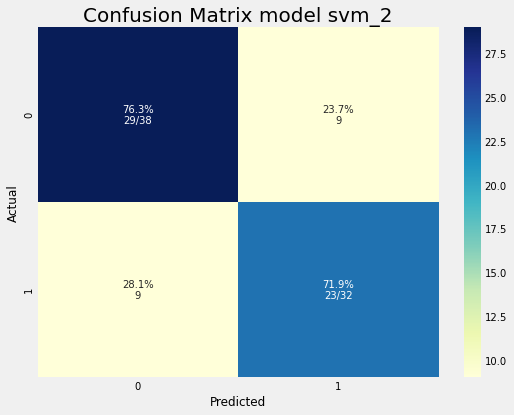

In [109]:
plot_cm(y_test, y_pred, figsize=(8,6))
plt.title('Confusion Matrix model svm_2', fontsize=20)
plt.savefig('cm_svm_2.png')

### AUC ROC curve svm_2 model

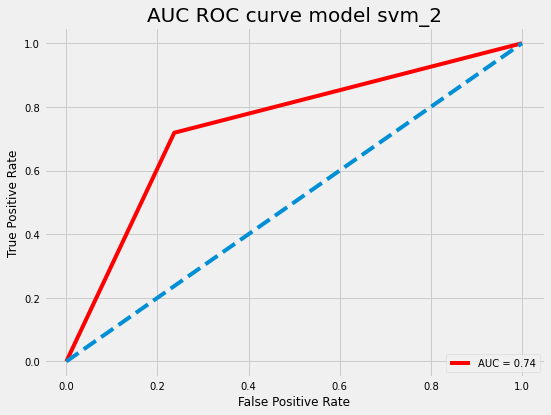

In [110]:
ROC(y_test, y_pred)
plt.title('AUC ROC curve model svm_2', fontsize=20)
plt.savefig('auc_roc_svm_2.png')

In [111]:
svm_1= SVC(C=5, coef0=10.0, degree=2, gamma=1, kernel='linear', random_state=62375)
svm_1.fit(X_train,y_train)
svm_1.score(X_train, y_train)

0.7821428571428571

In [112]:
y_pred = svm_1.predict(X_test)
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.71      0.69      0.70        32

    accuracy                           0.73        70
   macro avg       0.73      0.73      0.73        70
weighted avg       0.73      0.73      0.73        70



<a id="section-seven-three"></a>
## 7.3 Results part 2
#### Random Forest Classifier best performance

The rfc2 model of Random forest had the better performance in general with AUC test set score 0.84%

The hyperparameters used for this model were: bootstrap='True', criterion='entropy', max_depth=4, max_features='log2', n_estimators=5, oob_score='True'.
Which result in the follow 
__Classification Report:

Accuracy: 0.80

         precision    recall  f1-score   support

    0       0.82      0.82      0.82        38
    1       0.78      0.78      0.78        32

In [113]:
models_name = ['RandomForestClassifier', 'SVC']
models = [rfc2, svm_2]

def compare_roc_curves(X_train, y_train, X_test, y_test, models):
    fig, ax = plt.subplots(figsize=(8,6))
    
    for model in models:   
        model.fit(X_train, y_train)
        plot_roc_curve(model, X_test, y_test, ax=ax)
     
        ax.grid(linestyle='--')
        ax.set_ylabel('TPR', fontsize=18)
        ax.set_xlabel('FPR', fontsize=18)
        ax.set_title('Compare ROC curves - Test set', fontsize=18)
        ax.legend(bbox_to_anchor=(1,1), fontsize='large', title='Classifiers:', title_fontsize=18, labelspacing=0.8); 

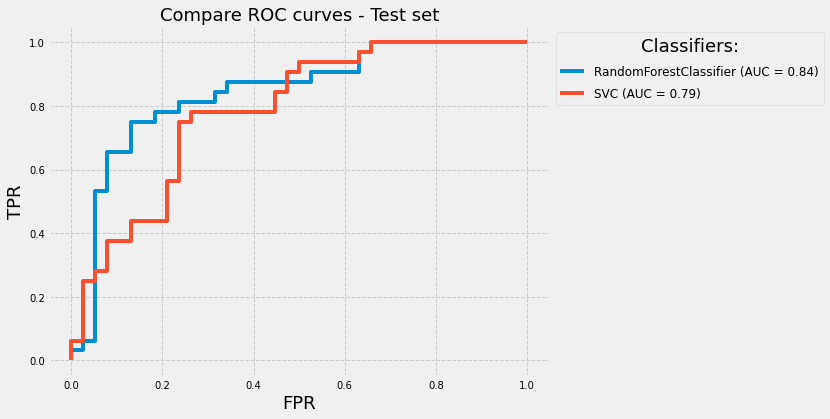

In [114]:
compare_roc_curves(X_train, y_train, X_test, y_test, models)
plt.savefig('compare models_p2.png')

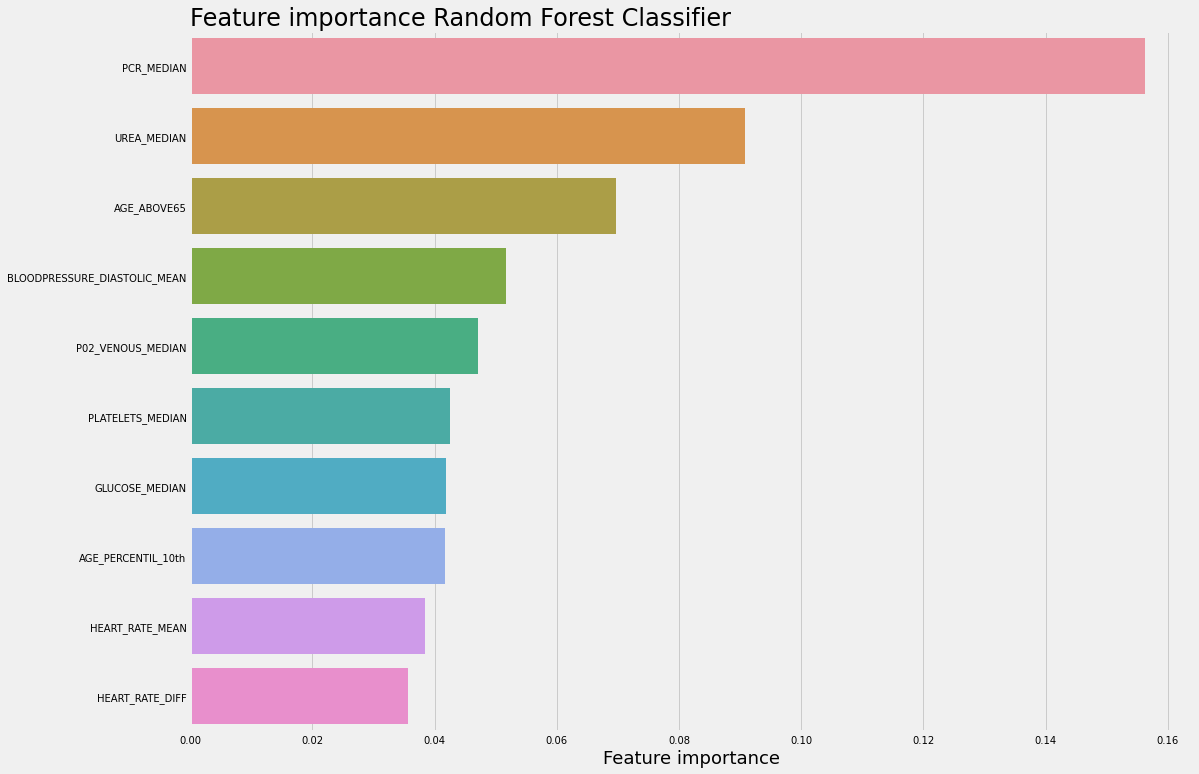

In [115]:
_ = pd.DataFrame({'feature_importance': rfc2.feature_importances_,
                  'variavel': X_train.columns}).sort_values('feature_importance', ascending=False)
plt.figure(figsize=(16, 12))
sns.barplot(data=_[:10], y='variavel', x='feature_importance', orient='h')
graphic_boost('Feature importance Random Forest Classifier', 
                    'Feature importance', '')

In [116]:
# Search for errors of the model in the validation set
for i in range(len(X_test)):
    prediction_data = X_test.iloc[i]
    prediction_data_array = prediction_data.values.reshape(1, -1)
    
    prob_arr = rfc2.predict_proba(prediction_data_array)
    pred = np.argmax(rfc2.predict_proba(prediction_data_array))
    
    if pred != y_test.iloc[i]:
        print(f'\nPredict {pred} ||| Probability -  ICU == 0: {prob_arr[0][0]} \t ICU == 1: {prob_arr[0][1]}')
        print(f'Valor V: {y_test.iloc[i]} ||| Index no test_set {i}\n')


Predict 1 ||| Probability -  ICU == 0: 0.482452313643803 	 ICU == 1: 0.517547686356197
Valor V: 0 ||| Index no test_set 1


Predict 1 ||| Probability -  ICU == 0: 0.40060624679979523 	 ICU == 1: 0.5993937532002047
Valor V: 0 ||| Index no test_set 2


Predict 1 ||| Probability -  ICU == 0: 0.23957509157509155 	 ICU == 1: 0.7604249084249084
Valor V: 0 ||| Index no test_set 4


Predict 1 ||| Probability -  ICU == 0: 0.463903743315508 	 ICU == 1: 0.5360962566844919
Valor V: 0 ||| Index no test_set 10


Predict 0 ||| Probability -  ICU == 0: 0.7081739934088265 	 ICU == 1: 0.2918260065911736
Valor V: 1 ||| Index no test_set 14


Predict 0 ||| Probability -  ICU == 0: 0.6760775364320756 	 ICU == 1: 0.3239224635679244
Valor V: 1 ||| Index no test_set 21


Predict 1 ||| Probability -  ICU == 0: 0.2542857142857143 	 ICU == 1: 0.7457142857142858
Valor V: 0 ||| Index no test_set 25


Predict 0 ||| Probability -  ICU == 0: 0.6331112973048457 	 ICU == 1: 0.3668887026951543
Valor V: 1 ||| Index no t

### Model Interpretation

Each point in the summary_plot is a variable in our dataset. Its vertical position indicates the name of the feature, its color indicates the value of the variable (in relation to the other variables of the same feature) and its horizontal position indicates how much that variable impacted the model, in addition to the direction of impact.

In the first plot, are the features of the patients that the model predicted would not need the ICU and in the second, the patients that the model predicted would be admitted. It is also worth remembering that all values were pre-scaled and normalized  by the team of Sirio Libanes hospital.


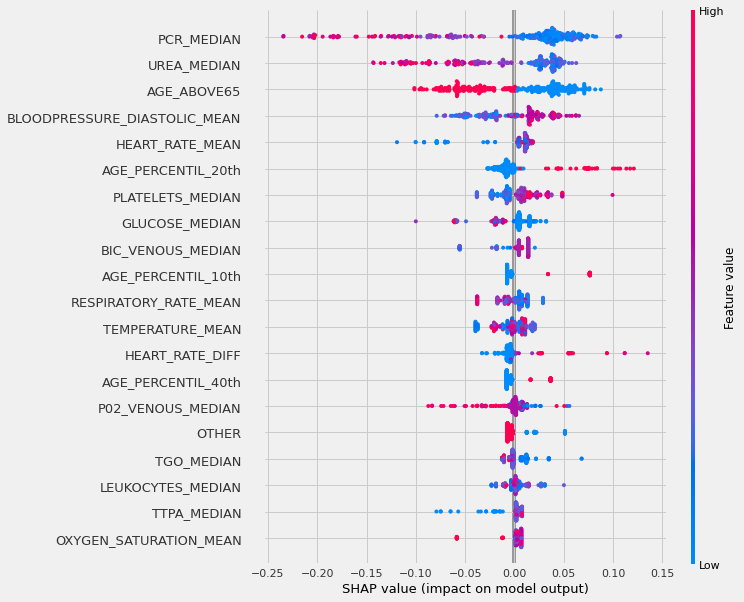

In [117]:
# Create the explainer and calculate the values SHAP for the model
explainer = shap.TreeExplainer(rfc2)
shap_values = explainer.shap_values(X_train)
# Plot SHAP values for patients that did not require ICU 
shap.summary_plot(shap_values[0], X_train)

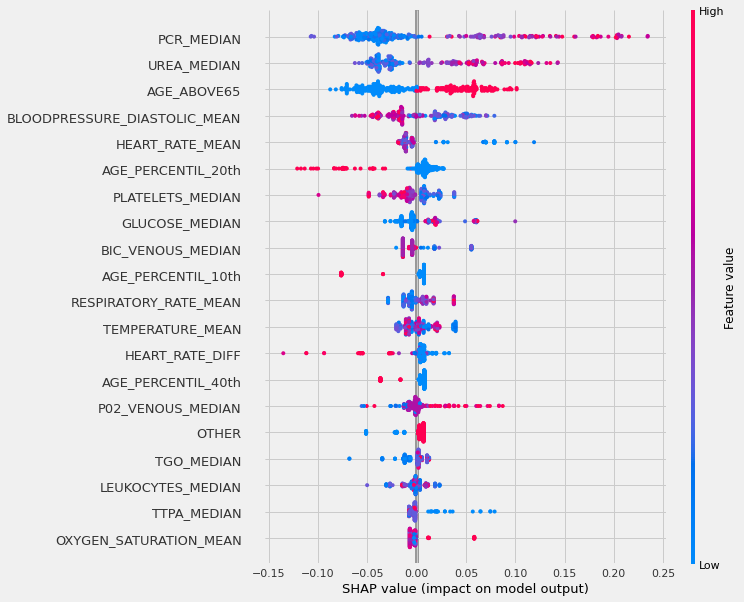

In [118]:
# Plot SHAP values for patients adimitted to ICU 
shap.summary_plot(shap_values[1], X_train)

### Using Shap values to explain the prediction of patient addmited to ICU
We predicted 0.72, whereas the base_value is 0.4643. The feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. 

The biggest impact comes from PCR_MEDIAN equal to -0.6121. Though the UREA_MEDIAN value has a meaningful effect decreasing the prediction.

In [119]:
shap_values = explainer.shap_values(X_test.iloc[20])

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[20])

__Here, in the below plot we look at alll test set for ICU = 1, which means they need ICU and see how the features contributed to the predictions. The plot is interactive, it allows to see different perspectives by selected the features from the scroll bar.__

In [120]:
shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)